In [55]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\kkdk0001\AppData\Local\Temp/ipykernel_24148/965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,"Superb phone in price range, can be bought",Writing after one month usePhone is superb in ...,27 September 2022
1,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,27 September 2022
2,4.0,Excellent,Design is soo good and camera have to be much ...,26 September 2022
3,4.0,Good enough,Battery life is good and I liked high speed ch...,22 September 2022
4,4.0,Good Performance,Nice mobile. Good Performance One Plus Nord Ce...,19 September 2022
...,...,...,...,...
4995,1.0,wrost phone don't buy any one and not refunded...,Third quality phone battery back up not and he...,18 May 2022
4996,3.0,"This phone is good,",After the usage of my one plus Nord ce 2 my ho...,26 June 2022
4997,1.0,Phone got power off within 1 month.,Phone got power off within 1 month. Very bad e...,7 June 2022
4998,1.0,Totally waste of money,Only paise khane wala product hai kuch bhi ach...,26 April 2022


In [8]:
df.to_csv("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Pa

In [9]:
reviews=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,"Superb phone in price range, can be bought",Writing after one month usePhone is superb in ...,27 September 2022
1,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,27 September 2022
2,4.0,Excellent,Design is soo good and camera have to be much ...,26 September 2022
3,4.0,Good enough,Battery life is good and I liked high speed ch...,22 September 2022
4,4.0,Good Performance,Nice mobile. Good Performance One Plus Nord Ce...,19 September 2022
...,...,...,...,...
4995,1.0,wrost phone don't buy any one and not refunded...,Third quality phone battery back up not and he...,18 May 2022
4996,3.0,"This phone is good,",After the usage of my one plus Nord ce 2 my ho...,26 June 2022
4997,1.0,Phone got power off within 1 month.,Phone got power off within 1 month. Very bad e...,7 June 2022
4998,1.0,Totally waste of money,Only paise khane wala product hai kuch bhi ach...,26 April 2022


In [10]:
reviews.Rating.describe()

count    5000.000000
mean        4.054600
std         1.253129
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [11]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Writing after one month usePhone is superb in ...,59
1,Drawbacks : 1. In-display fingerint is slow as...,41
2,Design is soo good and camera have to be much ...,17
3,Battery life is good and I liked high speed ch...,40
4,Nice mobile. Good Performance One Plus Nord Ce...,23


In [12]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Writing after one month usePhone is superb in ...,424.0
1,Drawbacks : 1. In-display fingerint is slow as...,273.0
2,Design is soo good and camera have to be much ...,86.0
3,Battery life is good and I liked high speed ch...,230.0
4,Nice mobile. Good Performance One Plus Nord Ce...,131.0


In [13]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Writing after one month usePhone is superb in ...,6.203390
1,Drawbacks : 1. In-display fingerint is slow as...,5.682927
2,Design is soo good and camera have to be much ...,4.117647
3,Battery life is good and I liked high speed ch...,4.897436
4,Nice mobile. Good Performance One Plus Nord Ce...,4.739130


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Writing after one month usePhone is superb in ...,17
1,Drawbacks : 1. In-display fingerint is slow as...,8
2,Design is soo good and camera have to be much ...,8
3,Battery life is good and I liked high speed ch...,13
4,Nice mobile. Good Performance One Plus Nord Ce...,4


In [15]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Writing after one month usePhone is superb in ...,0
1,Drawbacks : 1. In-display fingerint is slow as...,0
2,Design is soo good and camera have to be much ...,0
3,Battery life is good and I liked high speed ch...,0
4,Nice mobile. Good Performance One Plus Nord Ce...,0


In [16]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Writing after one month usePhone is superb in ...,0
1,Drawbacks : 1. In-display fingerint is slow as...,0
2,Design is soo good and camera have to be much ...,0
3,Battery life is good and I liked high speed ch...,0
4,Nice mobile. Good Performance One Plus Nord Ce...,0


In [17]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Writing after one month usePhone is superb in ...,0
1,Drawbacks : 1. In-display fingerint is slow as...,0
2,Design is soo good and camera have to be much ...,0
3,Battery life is good and I liked high speed ch...,1
4,Nice mobile. Good Performance One Plus Nord Ce...,0


In [18]:
reviews.drop(['hashtags'],axis=1,inplace=True)

In [19]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Writing after one month usePhone is superb in ...
1    Drawback : 1. In-display fingering is slow as ...
2    Design is so good and camera have to be much m...
3    Battery life is good and I liked high speed ch...
4    Vice mobile. Good Performance One Plus Word He...
Name: Review, dtype: object

In [20]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       27
1       27
2       26
3       22
4       19
        ..
4995    18
4996    26
4997     7
4998    26
4999     5
Name: Review_Date, Length: 5000, dtype: object 
 0       September
1       September
2       September
3       September
4       September
          ...    
4995          May
4996         June
4997         June
4998        April
4999        March
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [21]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,27,September,2022
1,27,September,2022
2,26,September,2022
3,22,September,2022
4,19,September,2022
...,...,...,...
4995,18,May,2022
4996,26,June,2022
4997,7,June,2022
4998,26,April,2022


In [22]:
df.Month.value_counts()

in           2400
March         526
April         467
May           358
June          348
July          304
August        258
September     221
February      118
Name: Month, dtype: int64

In [38]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'in':1}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,9
1,9
2,9
3,9
4,9
...,...
4995,5
4996,6
4997,6
4998,4


In [39]:
df1['Month'].unique() 

array([9, 2, 1, 8, 7, 6, 5, 3, 4], dtype=int64)

In [47]:
df1[['Date','Year']]=df1[['Date','Year']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4700 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   word_count   5000 non-null   int64  
 5   char_count   4700 non-null   float64
 6   avg_word     5000 non-null   float64
 7   stopwords    5000 non-null   int64  
 8   numerics     5000 non-null   int64  
 9   upper        5000 non-null   int64  
 10  Date         5000 non-null   object 
 11  Month        5000 non-null   int64  
 12  Year         5000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


In [48]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,numerics,upper,Date,Month,Year
0,4.0,"Superb phone in price range, can be bought",Writing after one month usePhone is superb in ...,59,424.0,6.203390,17,0,0,27,9,2022
1,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,41,273.0,5.682927,8,0,0,27,9,2022
2,4.0,Excellent,Design is soo good and camera have to be much ...,17,86.0,4.117647,8,0,0,26,9,2022
3,4.0,Good enough,Battery life is good and I liked high speed ch...,40,230.0,4.897436,13,0,1,22,9,2022
4,4.0,Good Performance,Nice mobile. Good Performance One Plus Nord Ce...,23,131.0,4.739130,4,0,0,19,9,2022


In [49]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,numerics,upper,Date,Month,Year
0,4.0,"Superb phone in price range, can be bought",Writing after one month usePhone is superb in ...,27 September 2022,59,424.0,6.203390,17,0,0,27,September,2022
1,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,27 September 2022,41,273.0,5.682927,8,0,0,27,September,2022
2,4.0,Excellent,Design is soo good and camera have to be much ...,26 September 2022,17,86.0,4.117647,8,0,0,26,September,2022
3,4.0,Good enough,Battery life is good and I liked high speed ch...,22 September 2022,40,230.0,4.897436,13,0,1,22,September,2022
4,4.0,Good Performance,Nice mobile. Good Performance One Plus Nord Ce...,19 September 2022,23,131.0,4.739130,4,0,0,19,September,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,wrost phone don't buy any one and not refunded...,Third quality phone battery back up not and he...,18 May 2022,25,150.0,5.040000,9,0,0,18,May,2022
4996,3.0,"This phone is good,",After the usage of my one plus Nord ce 2 my ho...,26 June 2022,63,331.0,4.269841,21,1,0,26,June,2022
4997,1.0,Phone got power off within 1 month.,Phone got power off within 1 month. Very bad e...,7 June 2022,16,93.0,4.875000,3,1,0,7,June,2022
4998,1.0,Totally waste of money,Only paise khane wala product hai kuch bhi ach...,26 April 2022,35,172.0,3.942857,0,1,0,26,April,2022


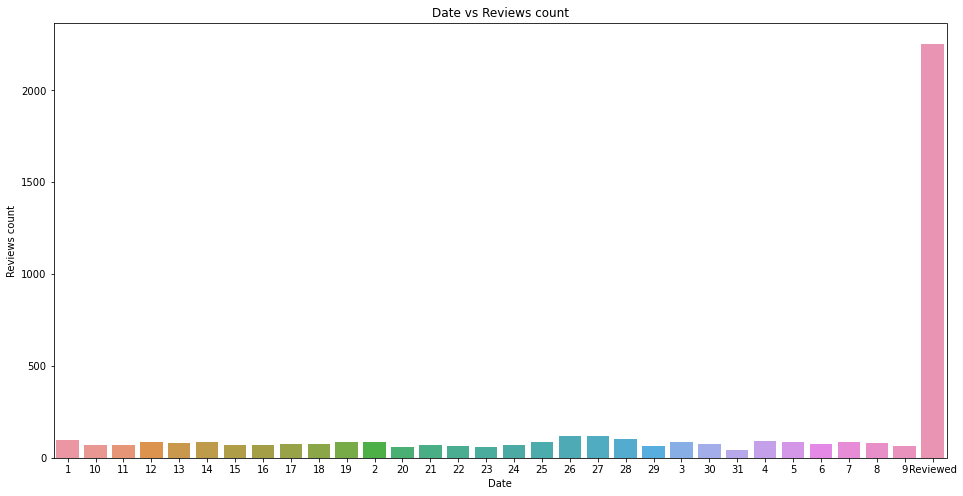

In [56]:
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date']
dayreview.sort_values(by = ['Date'])


plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

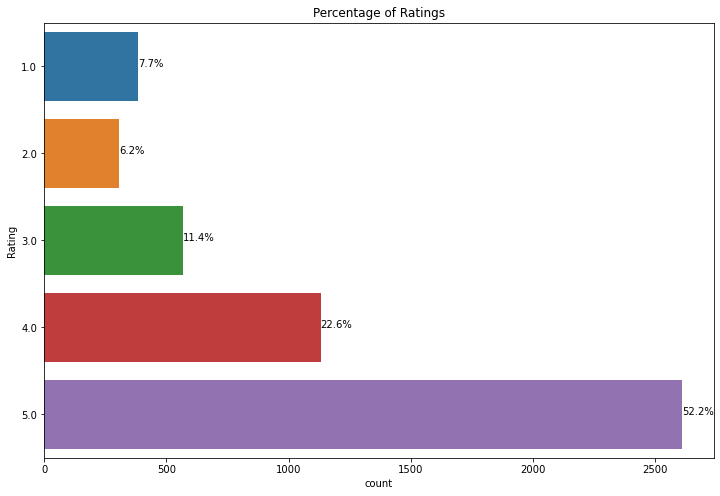

In [57]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

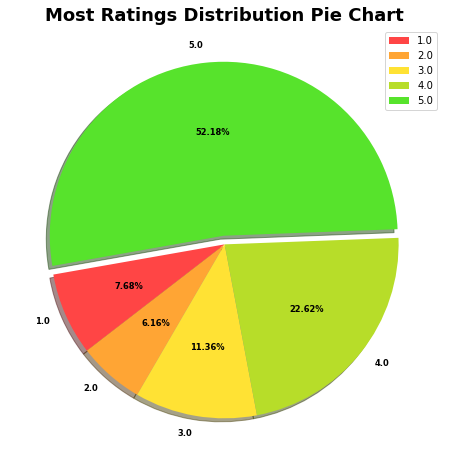

In [58]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [66]:
data = df[['Review']]
data

,Review
0,Writing after one month usePhone is superb in ...
1,Drawbacks : 1. In-display fingerint is slow as...
2,Design is soo good and camera have to be much ...
3,Battery life is good and I liked high speed ch...
4,Nice mobile. Good Performance One Plus Nord Ce...
...,...
4995,Third quality phone battery back up not and he...
4996,After the usage of my one plus Nord ce 2 my ho...
4997,Phone got power off within 1 month. Very bad e...
4998,Only paise khane wala product hai kuch bhi ach...


In [71]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [72]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [73]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [64]:

data

,Review
0,writing one month usephone superb prise rangeb...
1,drawbacks : 1. in-display fingerint slow compa...
2,design soo good camera much better overall pho...
3,battery life good i liked high speed charging....
4,nice mobile. good performance one plus nord ce...
...,...
4995,third quality phone battery back heating probl...
4996,"after usage one plus nord ce 2 honest review, ..."
4997,phone got power within 1 month. very bad exper...
4998,only paise khane wala product hai kuch bhi ach...


In [74]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [76]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...


In [77]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 


In [78]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [79]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [80]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [81]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [82]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [83]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [84]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [85]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [86]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [87]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...,"[writing, one, month, usephone, superb, prise,..."
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...,"[drawback, display, fingerint, slow, compared,..."
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...,"[design, soo, good, camera, much, better, over..."
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...,"[battery, life, good, liked, high, speed, char..."
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...,"[nice, mobile, good, performance, one, plus, n..."
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...,"[item, box, swith, mobile, give, someone, gift..."
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
7,camera good rest good,"Camera not that good , rest all is good.","[camera, good, rest, good]"
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...,"[liked, everything, price, level, best, betcam..."
9,excellent phone,Excellent phone 📱,"[excellent, phone]"


In [88]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [90]:
import codecs
with codecs.open("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [91]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [92]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...
5,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
6,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
7,camera good rest good,"Camera not that good , rest all is good."
8,liked everything price level best betcamera be...,Liked everything at this price level best betC...
9,excellent phone,Excellent phone 📱


In [93]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['drawback', 'display', 'fingerint', 'slow', 'compared', 'previous', 'vivo', 'z', 'x', 'phone', 'apps', 'crashing', 'time', 'sometimes', 'feeling', 'touch', 'issue', 'good', 'flawless', 'screen', 'hz', 'refresh', 'rate', 'camera', 'quality', 'great', 'light', 'sleak', 'phone', 'overall', 'recommend', 'buy'])

In [94]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [writing, one, month, usephone, superb, prise,...
1    [drawback, display, fingerint, slow, compared,...
2    [design, soo, good, camera, much, better, over...
3    [battery, life, good, liked, high, speed, char...
4    [nice, mobile, good, performance, one, plus, n...
5    [item, box, swith, mobile, give, someone, gift...
6    [medium, could, loaded, build, quality, rating...
7                           [camera, good, rest, good]
8    [liked, everything, price, level, best, betcam...
9                                   [excellent, phone]
Name: Clean_Reviews, dtype: object

In [95]:
from nltk.stem.snowball import SnowballStemmer


stemmer = SnowballStemmer("english")

In [96]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,write one month usephon superb prise rangeback...
1,drawback display fingerint slow compar previou...
2,design soo good camera much better overal phon...
3,batteri life good like high speed charg far fa...
4,nice mobil good perform one plus nord ce letes...
...,...
4944,third qualiti phone batteri back heat problem ...
4945,usag one plus nord ce honest review phone look...
4946,phone got power within month bad experi oneplu...
4947,paisa khane wala product hai kuch bhi acha nhi...


In [97]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,writing one month usephone superb prise rangeb...
1,drawback display fingerint slow compared previ...
2,design soo good camera much better overall pho...
3,battery life good liked high speed charging fa...
4,nice mobile good performance one plus nord ce ...
...,...
4944,third quality phone battery back heating probl...
4945,usage one plus nord ce honest review phone loo...
4946,phone got power within month bad experience on...
4947,paisa khane wala product hai kuch bhi acha nhi...


In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [99]:
print(cv.get_feature_names()[109:200])

['alot', 'already', 'alright', 'alril', 'also', 'alsooverall', 'alspath', 'alternate', 'alternative', 'although', 'aluminium', 'always', 'amaaaazziingg', 'amajan', 'amaze', 'amazed', 'amazing', 'amazingeverything', 'amazingly', 'amazon', 'amazonall', 'amazoncoming', 'amazone', 'ambient', 'amd', 'amej', 'amezing', 'amezon', 'ammount', 'amo', 'amoled', 'among', 'amonth', 'amount', 'amountdon', 'amountone', 'amozn', 'ample', 'ana', 'andar', 'andorid', 'andriod', 'android', 'angel', 'angle', 'angry', 'animation', 'annonce', 'announce', 'announced', 'announces', 'annoyed', 'annoying', 'another', 'answer', 'answered', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'aod', 'aor', 'apart', 'aperture', 'apk', 'apko', 'app', 'apparent', 'apparently', 'appcamera', 'appear', 'appearance', 'appears', 'apperance', 'apple', 'applicable', 'application', 'applied', 'apply', 'applying', 'appointment', 'apprehension', 'apprequested', 'appropriate', 'approx', 'approx

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aam', 'aane', 'aap', 'aata', 'aaya', 'aayega', 'aayi', 'ab', 'abides', 'able', 'abnormal', 'absent', 'absolutely', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'accepted', 'accepting', 'accesories', 'access', 'accessing', 'accessory', 'accha', 'accidental', 'accilent', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'accpet', 'accuracy', 'accurate', 'acha', 'achcha', 'achha', 'achhi', 'achieved', 'across', 'act', 'action', 'active', 'activity', 'actual', 'actually', 'ad', 'adapter', 'adaption', 'add', 'added', 'addicted', 'adding', 'additional', 'address', 'adequate', 'adjustment', 'adopted', 'adore', 'advance', 'advanced', 'advancement', 'advantage', 'advertised', 'advertisement', 'advice', 'advisable', 'aeroplane', 'aesthetic', 'aesthetically', 'af', 'affect', 'affected', 'afford', 'affordable', 'afterwards', 'agai', 'agar', 'agent', 'ager', 'aggregation', 'ago', 'agree', 'agreed', 'ahalf', 'ahead', 'aheadof', 'ai', 'aince', 

In [101]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [102]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4949 [00:00<?, ?it/s]

In [103]:
corpus[3]


'batteri life good like high speed charg far face heat hang problem gestur good camera featur good portrait mode could better also go fingerprint'

In [104]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [105]:
cv.get_feature_names()[:20]

['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'advanc']

In [106]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [107]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aa,aap,ab,abl,absolut,accept,access,accessori,accha,accord,...,year old,year secur,year secur updat,yellow,yesterday,yet,youtub,youtub video,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4947,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# TF-IDF Vectorizer

In [109]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4949 [00:00<?, ?it/s]

In [110]:
corpus[4]

'nice mobil good perform one plu nord ce letest updat come gb date mobil perform amaz'

In [111]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [112]:

X.shape

(4949, 5000)

In [113]:
tfidf_v.get_feature_names()[:20]

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'advanc']

In [114]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [115]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aa,aap,ab,abl,absolut,accept,access,accessori,accha,accord,...,year old,year secur,year secur updat,yellow,yesterday,yet,youtub,youtub video,yr,zoom
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4945,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4946,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4947,0.0,0.0,0.179001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# Named Entity Recognition 

In [117]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'writing one month usephone superb prise rangeback camera goodno laggingslim beautiful body good carrydisplay awesomesound awesomemultitasking superbquick charging superbnot liking power navigation button side causing frequently make screenshot setting talk speaker bottom phonefront camera upto mark screen finger sensor bit slow compare hardware drawback display fingerint slow compared previous vivo z x phone apps crashing time sometimes feeling touch issue good flawless screen hz refresh rate camera quality great light sleak phone overall recommend buy design soo good camera much better overall phone awesome battery life good liked high speed charging far faced heating hanging problem gesture good camera feature good portrait mode could better also go fingerprint nice mobile good performance one plus nord ce letest update coming gb date mobile performance amazing item box swith mobile give someone gift day record another video switching phone incase mobile problem upload video medium 

In [118]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [119]:
for token in doc_block[:50]:
    print(token,token.pos_)  

writing VERB
one NUM
month NOUN
usephone ADJ
superb ADJ
prise PROPN
rangeback NOUN
camera NOUN
goodno PROPN
laggingslim PROPN
beautiful ADJ
body NOUN
good ADJ
carrydisplay NOUN
awesomesound NOUN
awesomemultitasking VERB
superbquick ADJ
charging NOUN
superbnot VERB
liking VERB
power NOUN
navigation NOUN
button NOUN
side NOUN
causing VERB
frequently ADV
make VERB
screenshot NOUN
setting VERB
talk NOUN
speaker NOUN
bottom PROPN
phonefront PROPN
camera NOUN
upto NOUN
mark NOUN
screen NOUN
finger NOUN
sensor NOUN
bit VERB
slow ADJ
compare ADJ
hardware NOUN
drawback NOUN
display NOUN
fingerint VERB
slow ADJ
compared VERB
previous ADJ
vivo NOUN


In [120]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['hand', 'usage', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'cover', 'term', 'styling', 'phone', 'liked', 'recommend', 'attache', 'fingerprint', 'going', 'use', 'cover', 'matterdisplay', 'rating', 'plan', 'rate', 'work', 'wish', 'chin', 'thing', 'gorilla', 'glass', 'protection', 'screen', 'applied', 'panel', 'wellperformance', 'rating', 'dimensity', 'get', 'job', 'done', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'expect', 'cod', 'say', 'processor', 'competition', 'offering', 'decide', 'gaming', 'matter', 'year', 'usagesoftware', 'con', 'android', 'based', 'oxygen', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'android', 'ideacamera', 'rating', 'mp', 'atleast', 'expecting', 'sensor', 'provided', 'omnivison', 'sensor', 'get', 'job', 'done', 'camera', 'check', 'review', 'video', 'stability', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate']


In [121]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,phone,1986
1,camera,1357
2,battery,994
3,quality,818
4,product,411
5,charging,373
6,price,361
7,day,328
8,oneplus,305
9,life,303


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

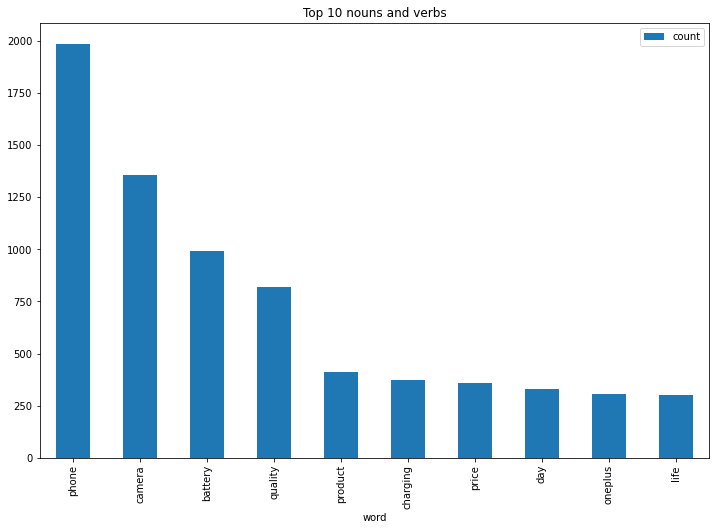

In [122]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [123]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [124]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [125]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,4382
neg,567


In [126]:
dataframe.Clean_Reviews[8]

'liked everything price level best betcamera better sometimes get artificial blue face still good one price level'

In [127]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.9153}

In [128]:
sid.polarity_scores(x.Clean_Reviews[8])

AttributeError: 'numpy.float64' object has no attribute 'Clean_Reviews'

In [129]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,writing one month usephone superb prise rangeb...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
1,drawback display fingerint slow compared previ...,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'comp..."
2,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp..."
3,battery life good liked high speed charging fa...,"{'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com..."
4,nice mobile good performance one plus nord ce ...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp..."


In [130]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,writing one month usephone superb prise rangeb...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.9274
1,drawback display fingerint slow compared previ...,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'comp...",0.9231
2,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.8720
3,battery life good liked high speed charging fa...,"{'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com...",0.8934
4,nice mobile good performance one plus nord ce ...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8591


In [131]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,writing one month usephone superb prise rangeb...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.9274,Positive
1,drawback display fingerint slow compared previ...,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'comp...",0.9231,Positive
2,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.8720,Positive
3,battery life good liked high speed charging fa...,"{'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com...",0.8934,Positive
4,nice mobile good performance one plus nord ce ...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8591,Positive
...,...,...,...,...
4944,third quality phone battery back heating probl...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6597,Negative
4945,usage one plus nord ce honest review phone loo...,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.9325,Positive
4946,phone got power within month bad experience on...,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",-0.7650,Negative
4947,paisa khane wala product hai kuch bhi acha nhi...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.1779,Positive


In [133]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [138]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,3352
1,Neutral,1038
0,Negative,559


<AxesSubplot:xlabel='sentiment', ylabel='count'>

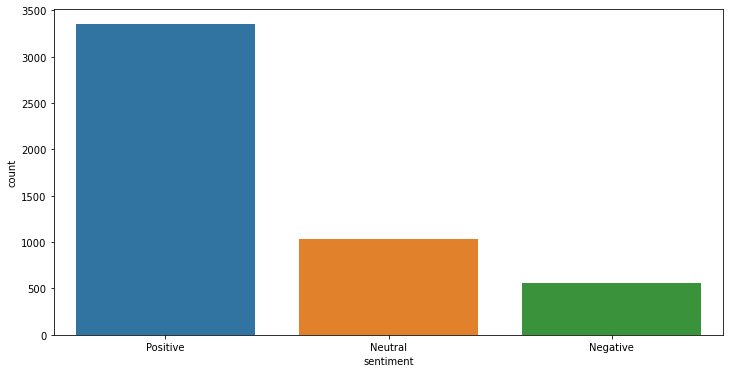

In [139]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

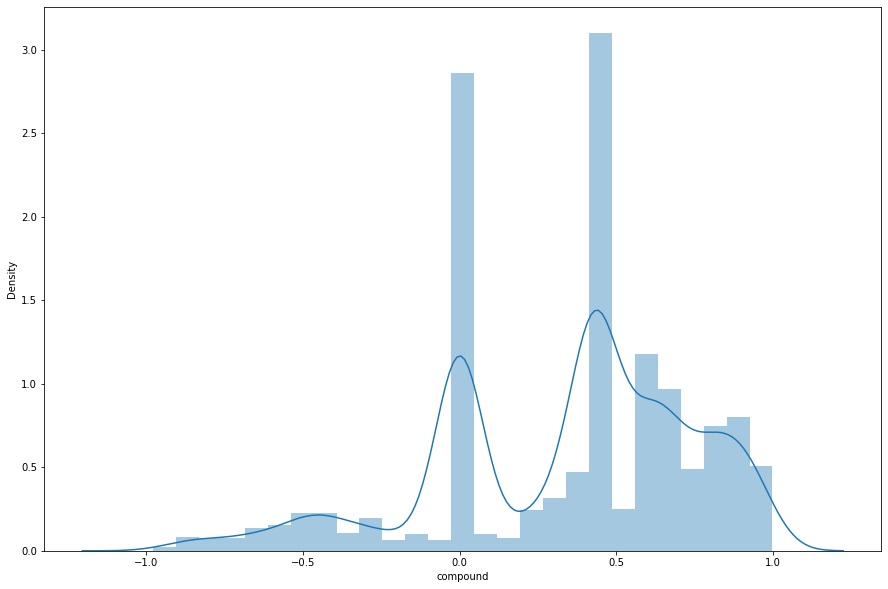

In [140]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [143]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,writing one month usephone superb prise rangeb...,43
1,drawback display fingerint slow compared previ...,32
2,design soo good camera much better overall pho...,9
3,battery life good liked high speed charging fa...,24
4,nice mobile good performance one plus nord ce ...,16


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

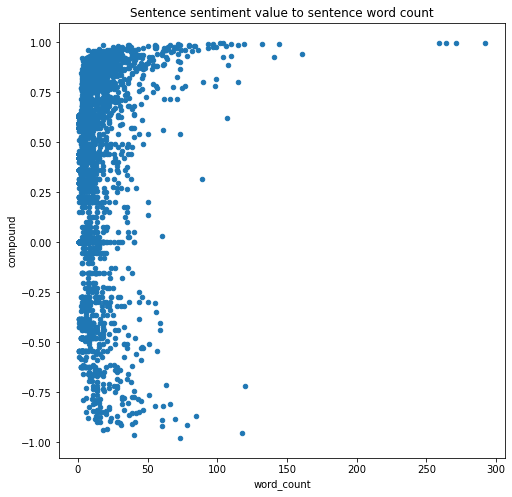

In [144]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [145]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,4490
neg,459


In [146]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...,0.660000,0.470000
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...,0.516667,0.347619
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...,0.525000,0.550000
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...,0.662857,0.494286
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...,0.833333,0.633333


Text(0, 0.5, 'Subjectivity')

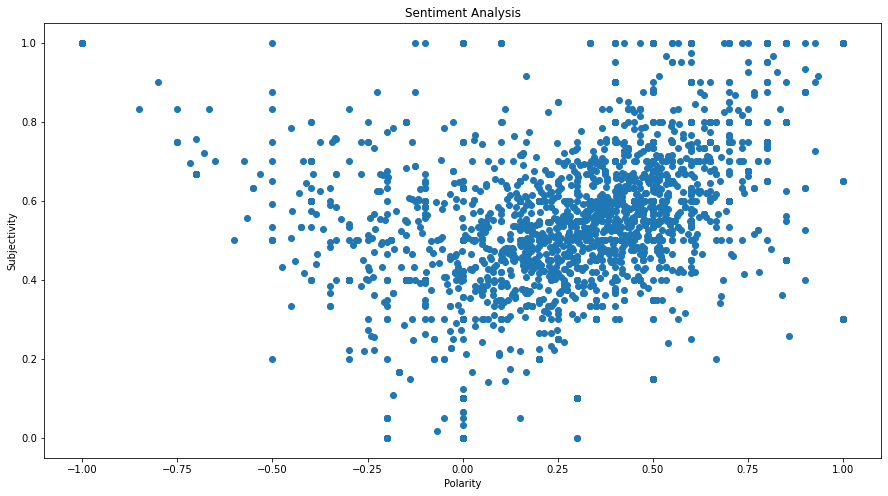

In [147]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [148]:

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [150]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,writing one month usephone superb prise rangeb...,Writing after one month usePhone is superb in ...,0.660000,0.470000,pos
1,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...,0.516667,0.347619,pos
2,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...,0.525000,0.550000,pos
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...,0.662857,0.494286,pos
4,nice mobile good performance one plus nord ce ...,Nice mobile. Good Performance One Plus Nord Ce...,0.833333,0.633333,pos


In [151]:
# Story Generation and Visualization

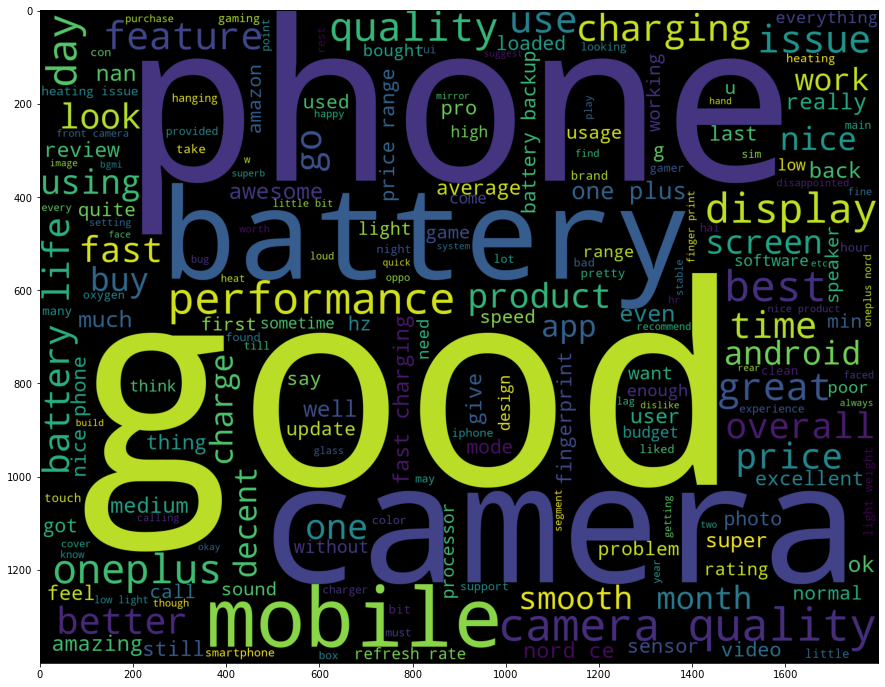

In [152]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [153]:
# Most common words in positive Review

In [154]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    

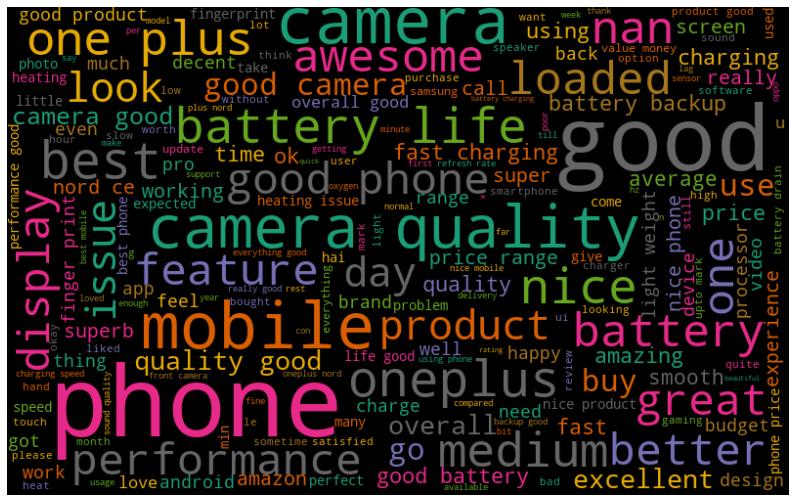

In [155]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

In [156]:
# Most common words in negative Review

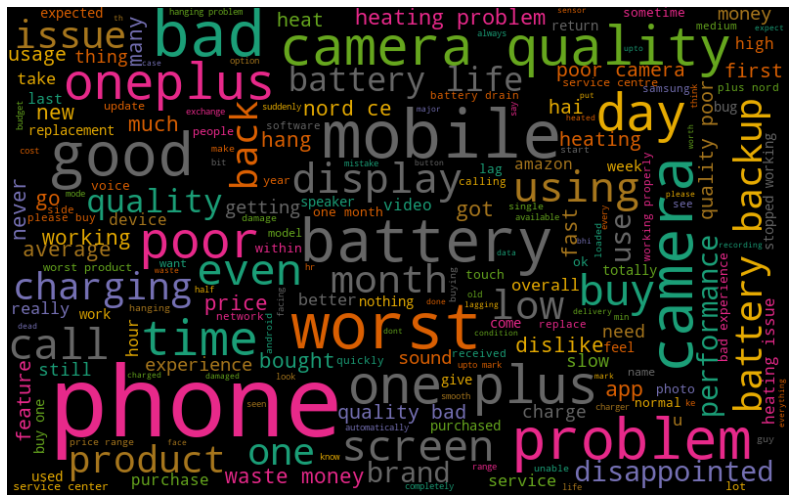

In [157]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)